# HW5 Coding Discussion

**By**: Venkata Lahari Julakanti 

**Acknowledgement**: Thank Tianyi Wang, Yang Li, Pan Lu, and Mahmoud (Ramin) Essalat, the previous TAs in this course, for their great discussion notes on CNN

## Content

**Implement convolutional neural network layers** (`NN-Layers.ipynb`, `nndl/conv_layers.py`)
 * Convolutional forward pass (`conv_forward_naive()`)
 * Convolutional backward pass (`conv_backward_naive()`)
 * Max pool forward pass (`max_pool_forward_naive()`)
 * Max pool backward pass (`max_pool_backward_naive()`)
 * Fast implementation of the CNN layers (provided in `utils/fast_layers.py`)
 * Implementation of cascaded layers (provided in `utils/conv_layer_utils.py`)

**Implement spatial normalization for CNNs** (`CNN-BatchNorm.ipynb`, `nndl/conv_layers.py`)
 * Spatial batch normalization forward pass (`spatial_batchnorm_forward()`)
 * Spatial batch normalization backward pass (`spatial_batchnorm_backward()`)

**Optimize your CNN for CIFAR-10** (`CNN.ipynb`, `nndl/cnn.py`)
 * Initialization, calculation of the loss and gradients (`ThreeLayerConvNet()`)
 * Get > 65% validation accuracy on CIFAR-10

## Convolutional Neural Networks Forward Pass

CNN forward pass: create the output feature.
* Input shape: `(N, C, H, W)`;     *N: # of examples; C:depth/#channel in input; H,W as height and weight
* Filter shape: `(F, C, Hf, Wf)`   *F: # of filters; C:depth/#channel of filter == depth of input

What is the shape of the output matrix?
* Output shape: `(N, F, H', W')`   *N :# of img examples; F :# of filters, H' and W' as height and weight of ouput matrix

The output size after accounting for stride and padding is:

$$
\left(\frac{w-w_f+2 \mathrm{pad}}{\text { stride }}+1, \frac{h-h_f+2 \mathrm{pad}}{\text { stride }}+1\right)
$$

Code implementation in `conv_forward_naive()`:

In [4]:
out_height = # H' = 1+(H+2*pad-HH)/stride   # determine the height of the output based on the equations above
out_width = # W' = 1+(W+2*pad-WW)/stride    # determine the width of the output based on the equations above
out = np.zeros() # (N, F, H', W')           # create the output using the calculated height and width

# for every img input
# iterate thru ouput pixels [i,j] ([vertical axis, horizontal axis]) 
# for each pixel in output, see the corresponding input window
# multiply input win with the filter(weight), take a sum over # channel
# conv(1*receptive_field*#ch, #filter*filter_size(==receptive_field)*#ch) -> #filter*1 (1 #filter-dim bar for [i,j] pixel)
# that's how wwe do for ONE output pixel [i,j] for ONE img example n 

for n in range(N):                                     # loop over the number of training samples
    for i in range(out_height):                        # loop over vertical axis of the output
        for j in range(out_width):                     # loop over horizontal axis of the output
            x_seg = xpad[]                             # determine the range of the input that is multiplied by the filters
            out[n,:,i,j] = np.sum(x_seg*w,axis=()) + b # calculate the output, b is bias term
                                                       # segment of the input x filter + b

SyntaxError: invalid syntax (464908307.py, line 1)

How to find the index for x_seg?

Find which part of the input correspond to the output

Re: w_out = (w_in+2*zp-w_filter)/stride - 1

Thus, we need i,j are chosen accordingly and include stride in for loop

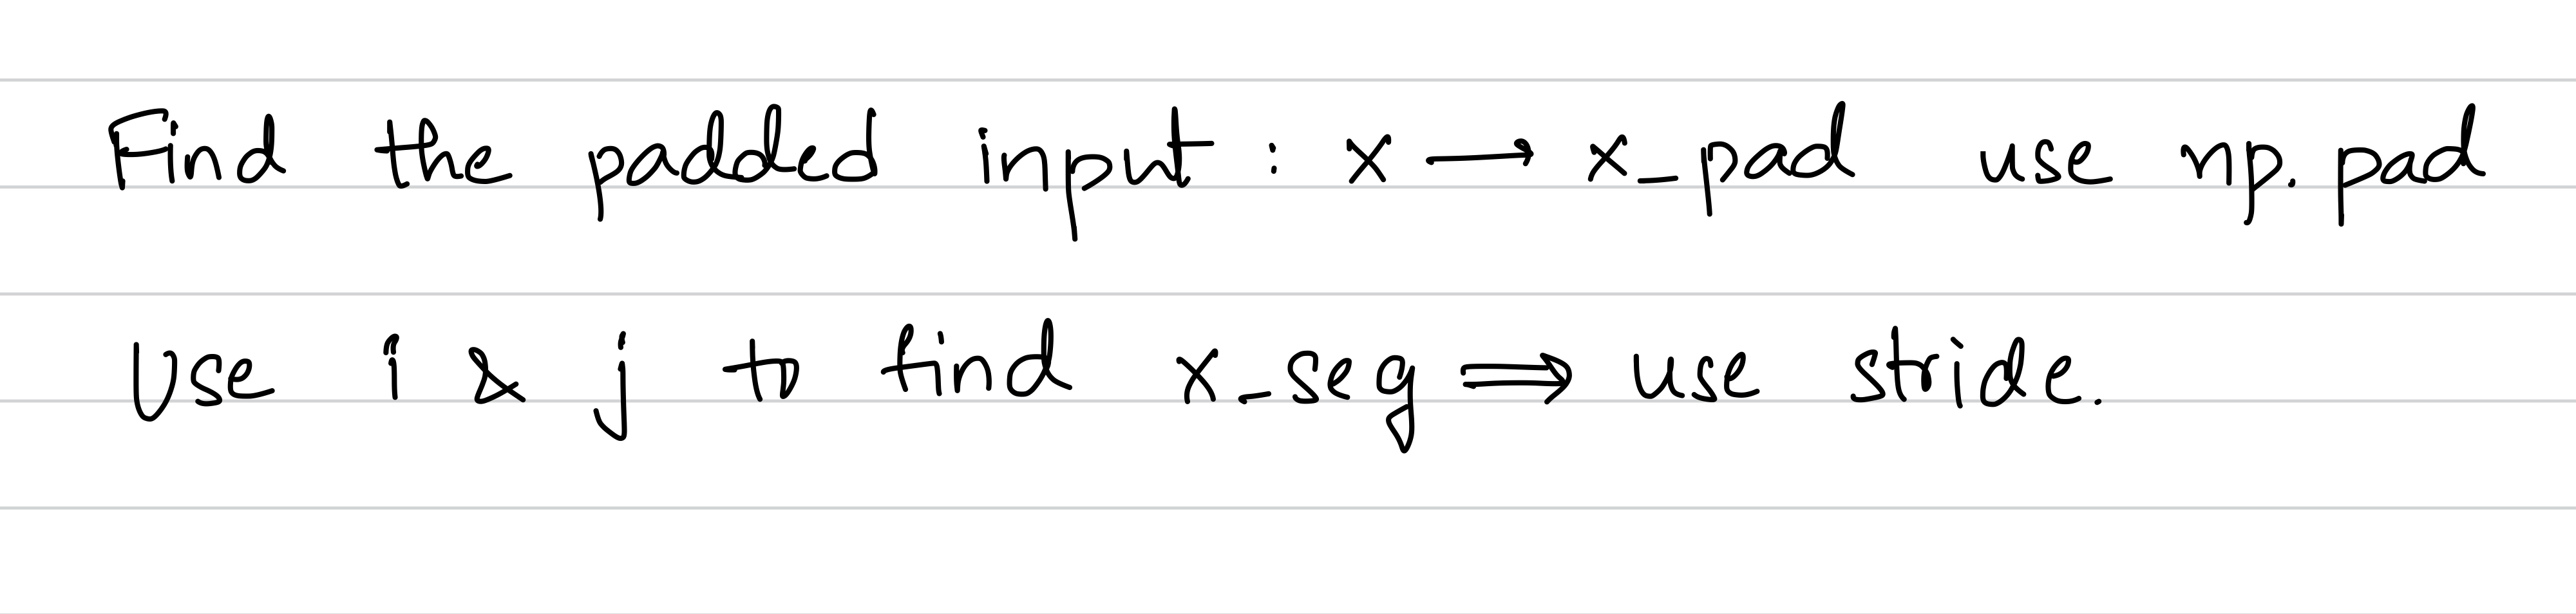

Hint: `np.sum` (https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

## Convolutional Neural Networks Backward Pass

Backward pass for a CNN layer: just like another CNN forward.

"Valid Conv" results in 3 outputs

dL/dy is 3*1 col vector

dL/db = dy/db * dL/dy; dy/db as 1*3 row vec; dL/dy as 3*1 col vec
Or can do due to broadcasting -> result: one vec hadamard dL/dy and sum over rows
dL/db as sum of dL/dy

dL/dW = dy/dW * dL/dy; dy/dW as 2*3 matrix
result: 2*3@3*1 = 2*1
dy_i/dW_j = as values of x 
dL/dW1 = dy/dW1 * dL/dy

*Both y1,y2,andy3 gets contribution from W1

### First see a 1D example

Forward: 



Backprop:
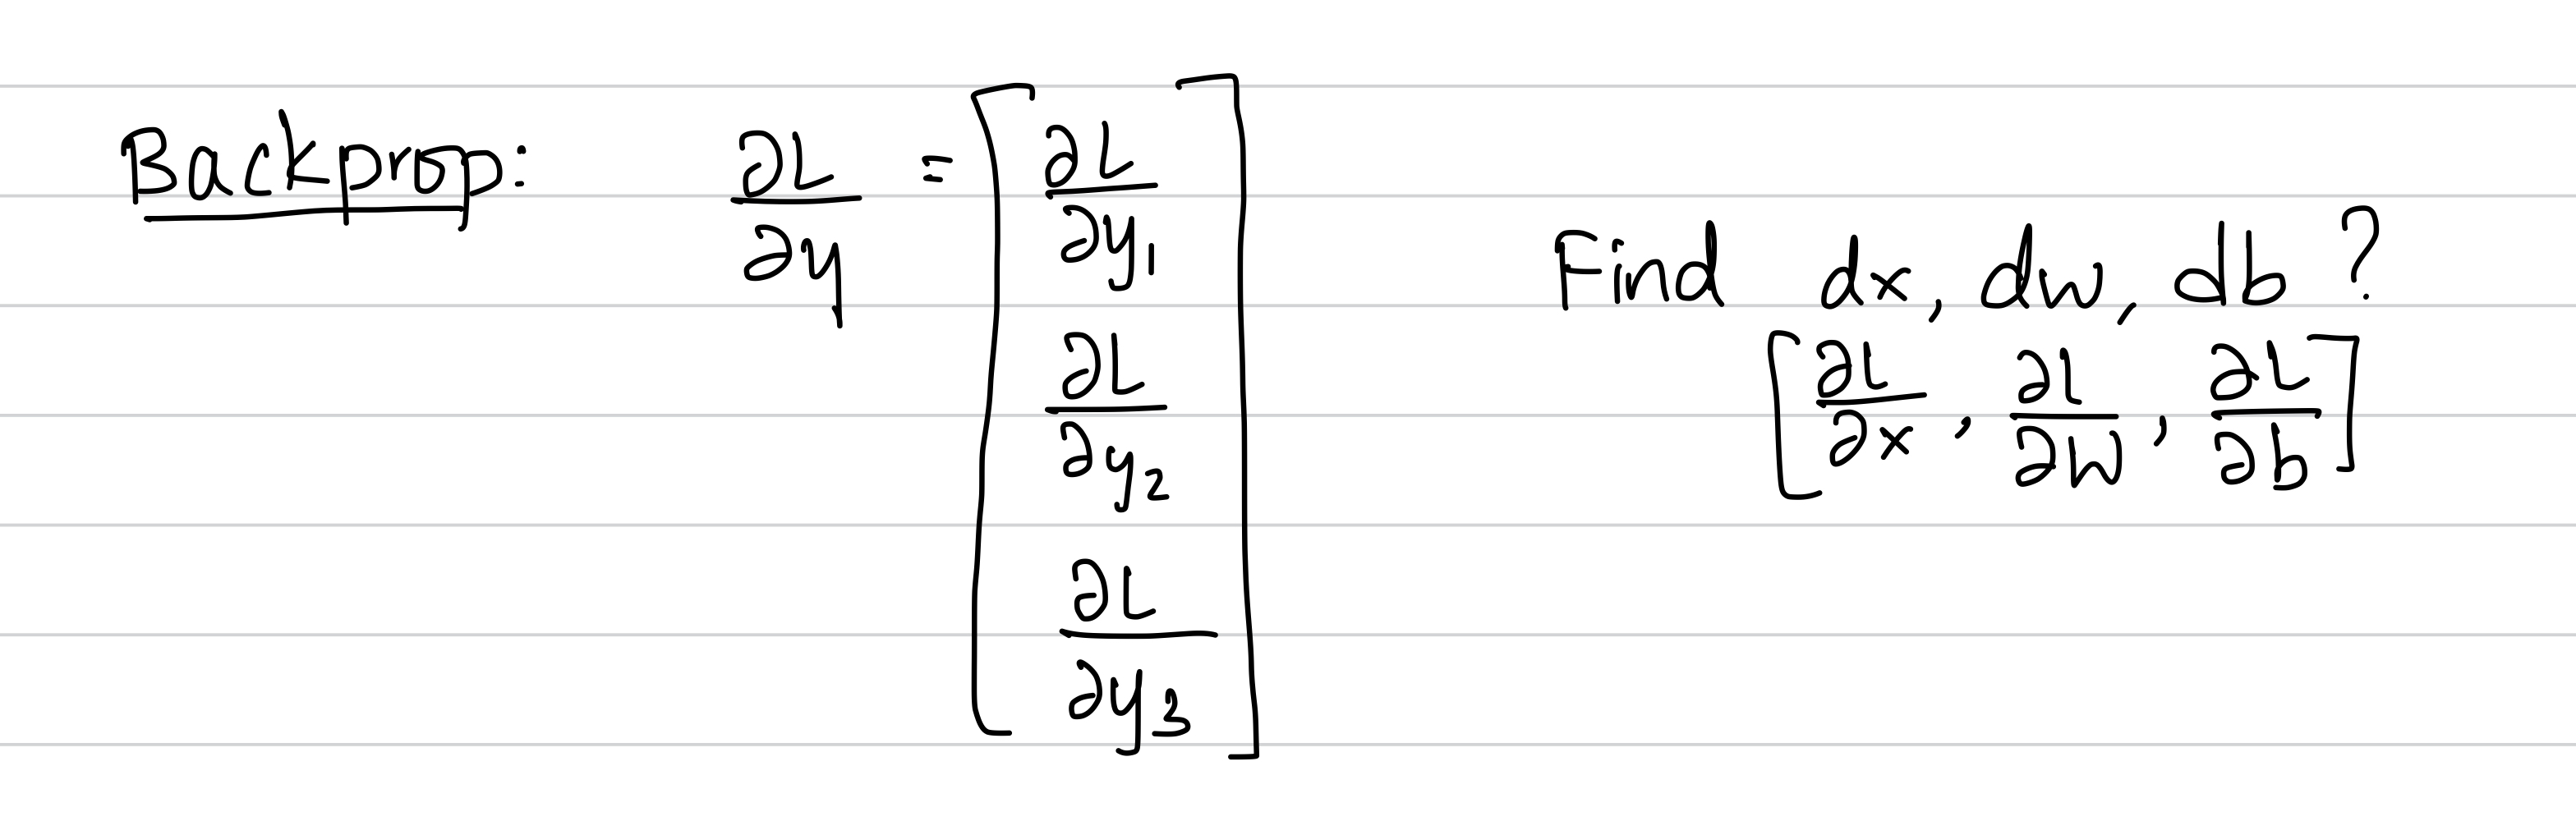

db:


dw:
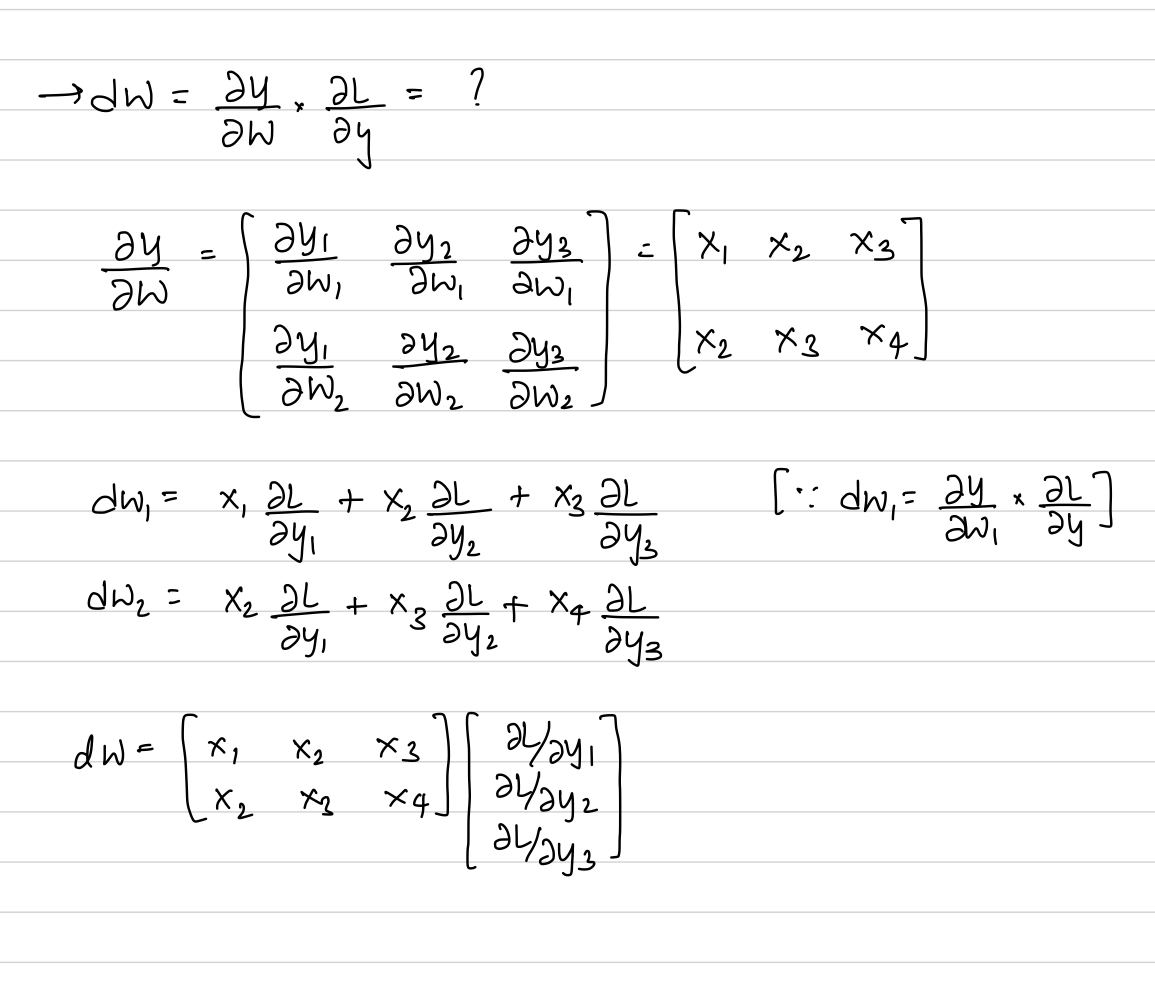

dx:


### Next: 2D example

Input: 2D matrix 4*4

Filter: 2D matrix 2*2
Both depth 1

dim of output y from zp and stride: Matrix 3*3 (bias included)

2D conv: y_i_j as sum along both directions x&y, from 1 to 2
take W matrix and corresponding input window, multiply and sum for output

Definition:


Forward pass:


Backward pass:

dL/dy: 3*3 matrix; entries: dL/dy_i_j

dL/db = dy/db hadamard dL/dy; dy/db: 1*3*3 dL/dy: 3*3
for all y entries in the y mat, there exist a bias b -> so dy/db as mat of 1

due to multi pathes from broadcasting, dL/db as sum of all entries in dy/db hadamard dL/dy

dL/dW: 2*2 matrix
dL/dW_mn = dy/dW_mn hadamard dL/dy; dy/dW_mn: 1*3*3 dL/dy: 3*3
dy/dW_mn is 3*3; dL/dW_mn is scalar
Again, it's a sum across all i,j element for sum over i,j, dy_ij/dW_mn*dL/dy_ij

dy_ij/dW_mn is dependent on the receptive field k,l; there is an element-wise equation

dW as 2*2 matrix obtained by conv(X,dy) 

dL/dX: 4*4 matrix
similarly, start with dL/dx_mn 
dy_ij/dx_mn dependent on receptive field

again, we have element wise expression w/ substitutions
and we have a matrix version w/ 2Dconv, zp, and flip of matrix 
filter 180 flip for W
zp dL/dy matrix





db:
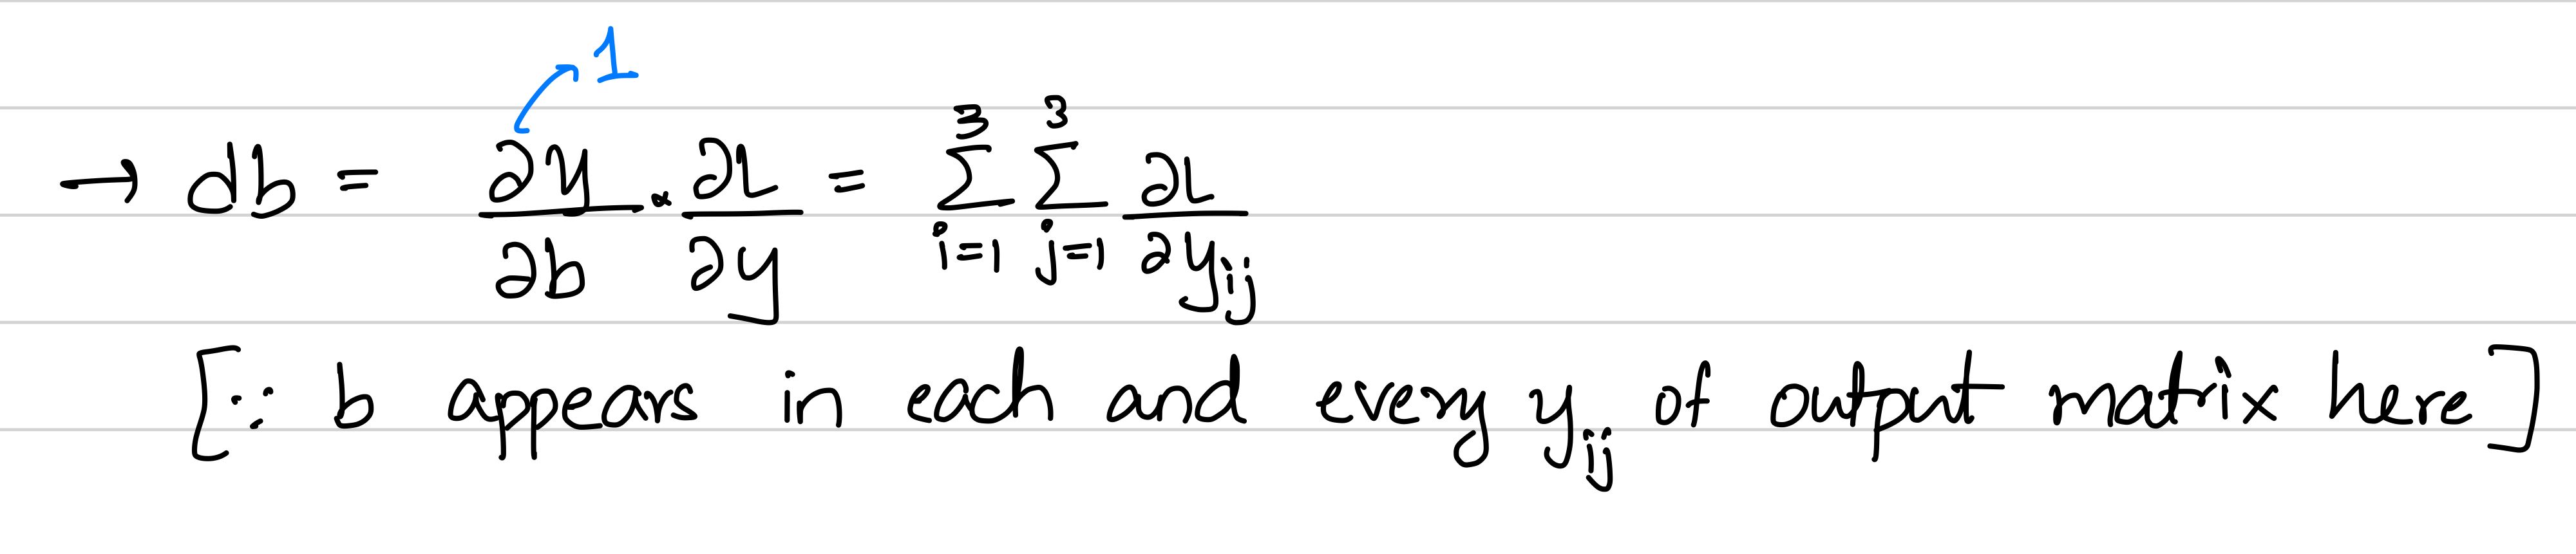

dw: 


dx:
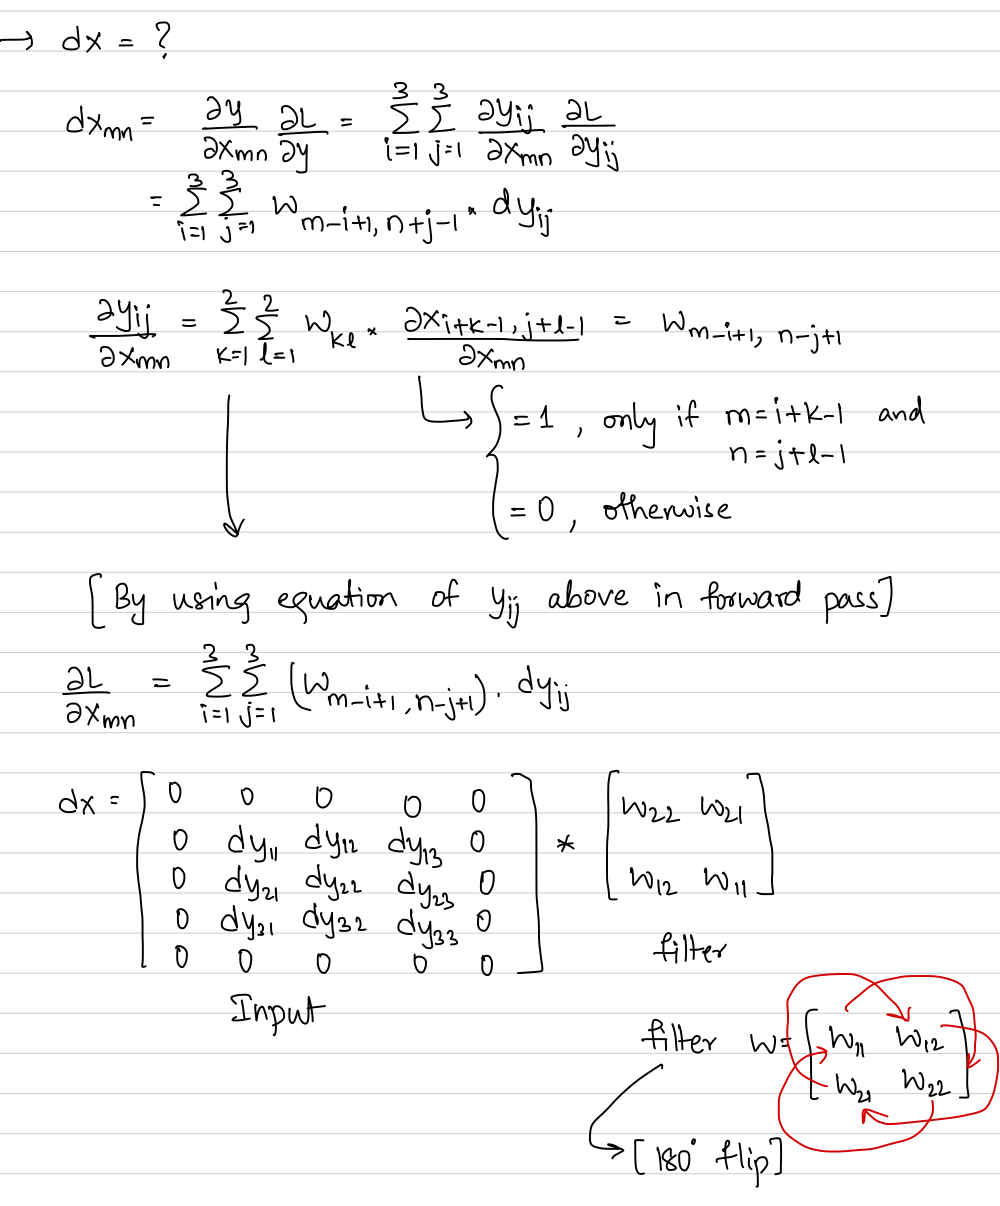

Code implementation in `conv_backward_naive()`:

In [ ]:
dx = np.zeros()                                # create dx, should have the same shape as x: (N, C, H, W)
dw = np.zeros()                                # create dw, should have the same shape as w: (F, C, HH, WW)
dxpad = np.zeros()                             # create dxpad, should have the same shape as xpad 

db = np.sum()                                  # calculate db

# have upstream grad for each example dL/dy
# interate over # training example
# loop over vertical and horizontal axises of output
# for each output pixel, find corresponding window receptive field in input
# find the x_seg the upstream x values connected to this ij in output
# find dw, dxpad from upstream grad using cache
# dw & dxpad need to be accumulated; they add up
# dx as truncated dx_pad

for n in range(N):                             # loop over the number of training samples
    for i in range(out_height):                # loop over vertical axis of the output
        for j in range(out_width):             # loop over horizontal axis of the output
            for f in range(num_filts):         # loop over the number of filters
                x_seg = xpad[]                 # determine the range of input that will be multiplied by the upstream derivative
                dw[] +=                         # calculate dw
                dxpad[] +=                      # calculate dxpad

dx = dxpad[]                                   # calculate dx from dxpad

Hint: Check reference [1] for more details.

## Convolutional Neural Networks Max Pooling Forward

find corresponding input
find max
put as output

A naive implementation of the forward pass for a max pooling layer.
  
  Inputs:
  - x: Input data, of shape (N, C, H, W)
  - pool_param: dictionary with the following keys:
    - `pool_height`: The height of each pooling region
    - `pool_width`: The width of each pooling region
    - `stride': The distance between adjacent pooling regions
  Returns a tuple of:
  - `out`: Output data
  - `cache`: (x, pool_param)
  
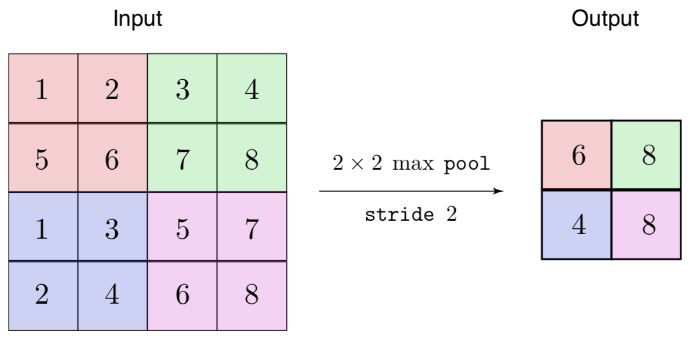

In [ ]:
out_height =                                    #determine the height of the output based on the equations above
out_width =                                     #determine the width of the output based on the equations above
out = np.zeros()                                #create the output using the calculated height and width

# for each filter
# for each channel
# find max on corresponding input field
# np.amax() gives max argument

for n in range(N):                              #loop over the number of training samples
    for c in range(C):                          #loop over the number of channels
        for i in range(out_height):             #loop over vertical axis of the output
            for j in range(out_width):          #loop over horizontal axis of the output
                out[] = np.amax()               # equivalent function: np.max()

Hint:
- np.max(): https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html
- np.amax(): https://numpy.org/doc/stable/reference/generated/numpy.amax.html

y is 2*2
x is 4*4

so you need a mask with hotspot 1 at the max value


## Convolutional Neural Networks Max Pooling Backward

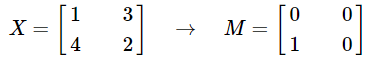

In [ ]:
# loop through all example
# loop through all channel
# for each output in output matrix find the x_seg, corresponding input window
# get correct mask with 1 at hotpot
# np.multiply w/ mask and add to dx 

for n in range(N):                              # loop over the number of training samples
    for c in range(C):                          # loop over the number of channels
        for i in range(dout_height):            # loop over vertical axis of the dout
            for j in range(dout_width):         # loop over horizontal axis of the dout
                index =                         # find the range of the pooling layer input x
                mask = (x == np.amax(x))        # create the mask that marks the maximum element as 1 and 0 for the rest
                dx[] +=  np.multiply()          

Hint: `np.multiply()`: https://numpy.org/doc/stable/reference/generated/numpy.multiply.html?highlight=np%20multiply

## Reference

[1] https://pavisj.medium.com/convolutions-and-backpropagations-46026a8f5d2c

[2] https://medium.com/@mayank.utexas/backpropagation-for-convolution-with-strides-8137e4fc2710

[3] https://medium.com/@mayank.utexas/backpropagation-for-convolution-with-strides-fb2f2efc4faa

[4] https://numpy.org/devdocs/user/basics.indexing.html

[5] Prof. Kao's lecture notes